In [20]:
# Author: Dattaraj Rao (dattarajrao@yahoo.com)
# Demonstration of generating new hollywood movie names by learning from move names datset
# More examples covered in book - Keras to Kubernetes: The Journey of a Machine Learning Model to Production
# https://www.amazon.com/Keras-Kubernetes-Journey-Learning-Production/dp/1119564832

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['imdb-dataset', 'imdb-5000-movie-dataset']


In [21]:
movies = pd.read_csv('../input/imdb-5000-movie-dataset/movie_metadata.csv')
print(movies.columns)
movie_titles = movies['movie_title']
movie_titles.head()

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

In [22]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# prepare tokenizer
tok = Tokenizer()
tok.fit_on_texts(movie_titles)
vocab_size = len(tok.word_index) + 1
print("Vocabulary size = ", vocab_size)
print("-------------------------------")
# integer encode the documents
encoded_docs = tok.texts_to_sequences(movie_titles)
print("Encoded = ", encoded_docs[:10])
print("-------------------------------")
# pad documents to a max length of 10 words for movie title
max_length = 8
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='pre')
print("Padded = ", padded_docs[:10])
print("-------------------------------")

Vocabulary size =  5773
-------------------------------
Encoded =  [[1733], [246, 2, 1, 407, 32, 408, 409], [1734], [1, 49, 410, 1735], [35, 133, 198, 917, 1, 411, 1736], [306, 578], [247, 19, 37], [1737], [1738, 199, 2, 1739], [91, 162, 4, 1, 412, 58, 579]]
-------------------------------
Padded =  [[   0    0    0    0    0    0    0 1733]
 [   0  246    2    1  407   32  408  409]
 [   0    0    0    0    0    0    0 1734]
 [   0    0    0    0    1   49  410 1735]
 [   0   35  133  198  917    1  411 1736]
 [   0    0    0    0    0    0  306  578]
 [   0    0    0    0    0  247   19   37]
 [   0    0    0    0    0    0    0 1737]
 [   0    0    0    0 1738  199    2 1739]
 [   0   91  162    4    1  412   58  579]]
-------------------------------


In [23]:
from numpy import array
from keras.utils import to_categorical

# input is sequence and output next word
sequences = array(padded_docs)
print(sequences.shape)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]

(5043, 8)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 7, 100)            577300    
_________________________________________________________________
lstm_13 (LSTM)               (None, 7, 100)            80400     
_________________________________________________________________
lstm_14 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_12 (Dense)             (None, 5773)              583073    
Total params: 1,321,173
Trainable params: 1,321,173
Non-trainable params: 0
_________________________________________________________________
None


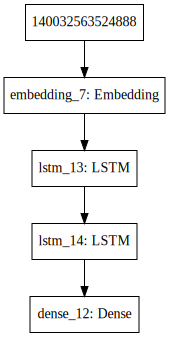

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.utils.vis_utils import plot_model

# define model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
#model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

Train on 3782 samples, validate on 1261 samples
Epoch 1/100
3782/3782 [==============================] - 3s 795us/step - loss: 8.6176 - acc: 0.0135 - val_loss: 8.5298 - val_acc: 0.0056
Epoch 2/100
3782/3782 [==============================] - 1s 273us/step - loss: 8.0414 - acc: 0.0177 - val_loss: 9.4298 - val_acc: 0.0056
Epoch 3/100
3782/3782 [==============================] - 1s 271us/step - loss: 7.6875 - acc: 0.0177 - val_loss: 9.8277 - val_acc: 0.0056
Epoch 4/100
3782/3782 [==============================] - 1s 269us/step - loss: 7.6120 - acc: 0.0177 - val_loss: 10.0826 - val_acc: 0.0056
Epoch 5/100
3782/3782 [==============================] - 1s 269us/step - loss: 7.5920 - acc: 0.0177 - val_loss: 10.2683 - val_acc: 0.0056
Epoch 6/100
3782/3782 [==============================] - 1s 271us/step - loss: 7.5771 - acc: 0.0177 - val_loss: 10.4151 - val_acc: 0.0056
Epoch 7/100
3782/3782 [==============================] - 1s 267us/step - loss: 7.5776 - acc: 0.0177 - val_loss: 10.5086 - val_a

Epoch 60/100
3782/3782 [==============================] - 1s 245us/step - loss: 5.9599 - acc: 0.0526 - val_loss: 11.8117 - val_acc: 0.0119
Epoch 61/100
3782/3782 [==============================] - 1s 243us/step - loss: 5.9216 - acc: 0.0568 - val_loss: 11.7888 - val_acc: 0.0119
Epoch 62/100
3782/3782 [==============================] - 1s 244us/step - loss: 5.8867 - acc: 0.0587 - val_loss: 11.8420 - val_acc: 0.0119
Epoch 63/100
3782/3782 [==============================] - 1s 250us/step - loss: 5.8578 - acc: 0.0590 - val_loss: 11.8628 - val_acc: 0.0119
Epoch 64/100
3782/3782 [==============================] - 1s 246us/step - loss: 5.8298 - acc: 0.0632 - val_loss: 11.9409 - val_acc: 0.0119
Epoch 65/100
3782/3782 [==============================] - 1s 246us/step - loss: 5.7996 - acc: 0.0650 - val_loss: 11.9509 - val_acc: 0.0103
Epoch 66/100
3782/3782 [==============================] - 1s 252us/step - loss: 5.7702 - acc: 0.0677 - val_loss: 11.9869 - val_acc: 0.0111
Epoch 67/100
3782/3782 [===

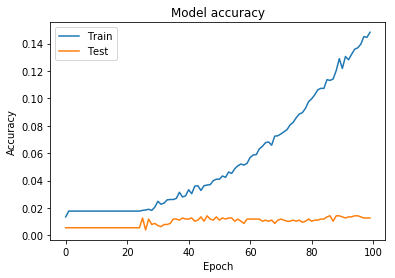

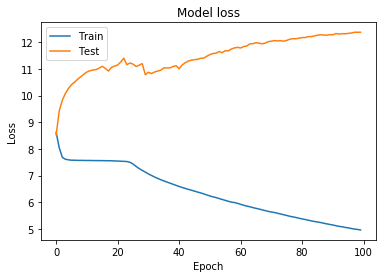

In [25]:
# fit model
history = model.fit(X, y, batch_size=128, epochs=100, validation_split=0.25)

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
from random import randint

# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
        result.append(out_word)
    return ' '.join(result)

# select a seed text
for count in range(100):
    seed_text = movie_titles[randint(0,len(movie_titles))]
    print("Seed text = ", seed_text)

    # generate new text
    generated = generate_seq(model, tok, seq_length, seed_text, 5)
    print("Generated text = ", generated)

Seed text =  What's Love Got to Do with It 
Generated text =    2      evil 
Seed text =  10 Days in a Madhouse 
Generated text =  vegas  you  2  world  evil 
Seed text =  21 
Generated text =  island  go  men  you   
Seed text =  The Widow of Saint-Pierre 
Generated text =  rabbit  khan  4d  jing  evil 
Seed text =  Crash 
Generated text =  island  go  men  you   
Seed text =  No Good Deed 
Generated text =  black  me  2     
Seed text =  Mr. Turner 
Generated text =  girls  black  2     
Seed text =  The Little Ponderosa Zoo 
Generated text =  movie  back  water  zion  jing 
Seed text =  The Long Kiss Goodnight 
Generated text =  county  down  2  back  evil 
Seed text =  Maleficent 
Generated text =  island  county  men  you   
Seed text =  Freeway 
Generated text =  island  go  men  you   
Seed text =  Jaws: The Revenge 
Generated text =  evil  vengeance  america  west  jing 
Seed text =  Nerve 
Generated text =  island  go  you  you   
Seed text =  Stir of Echoes 
Generated text = 